# Using K-Means clustering algorithm in Python

## Task 1

Importing all the required libraries:

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Reading the CSV file and looking at the first five rows of the data:

In [2]:
data = pd.read_csv('./Data/clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


We got a table of customers data with 13 columns

We will be taking only two variables from the data – “LoanAmount” and “ApplicantIncome”.
This will make it easy to visualize the steps as well. Let’s pick these two variables and
visualize the data points:

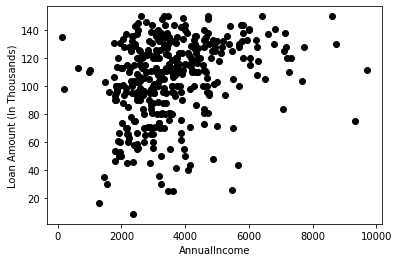

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

We got a scatter plot where the x-axis represents the annual income of the customer and the y-axis represents the loan amount

Steps 1 and 2 of K-Means were about choosing the number of clusters (k) and selecting
random centroids for each cluster. We will pick 3 clusters and then select random
observations from the data as the centroids:

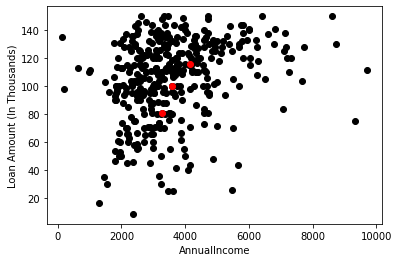

In [4]:
#number of clusters
K=3
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

We got the same scatter plot but now 3 of the dots are red.
Here, the red dots represent the 3 centroids for each cluster. Note that we have chosen
these points randomly and hence every time you run this code, you might get different
centroids.

Next, we will define some conditions to implement the K-Means Clustering algorithm. Let’s
first look at the code:

In [5]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

318.08816579374286
200.55742674542654
258.95986160192535
225.82827972554003
205.1181293797553
87.59714920167968
80.42253001270922
99.50821192263949
27.38200063816943
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


We got a list of numbers with a zero at the end, that were calculated while recomputing centroids of the new clusters

These values might vary every time we run this. Here, we are stopping the training when
the centroids are not changing after two iterations. We have initially defined the diff as 1 and
inside the while loop, we are calculating this diff as the difference between the centroids in
the previous iteration and the current iteration.
When this difference is 0, we are stopping the training. Let’s now visualize the clusters we
have got:

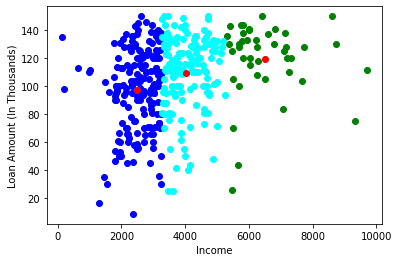

In [6]:
color=['blue','green','cyan']
for k in range(K):
 data=X[X["Cluster"]==k+1]
 plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

We got our scatterplot with customer data segmented into 3 clusters, with low, average and high customer income where each segment has its own color (blue, green or cyan), with red dots that are centroids of the each cluster. So we can see that the data was successfully divided into groups based on the customer income and now the bank can use it for the further purposes

## Task 2

Let’s now implement the K-Means Clustering algorithm in Python. We will also see how to
use K-Means++ to initialize the centroids and will also plot this elbow curve to decide what
should be the right number of clusters for our dataset.

**The aim of this problem is to segment the clients of a wholesale distributor based on
their annual spending on diverse product categories, like milk, grocery, region,
etc.**

We will first import the required libraries:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Next, let’s read the data and look at the first five rows:

In [8]:
data=pd.read_csv("./Data/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


We got a table of customers data with 8 columns

We have the spending details of customers on different products like Milk, Grocery, Frozen,
Detergents, etc. Now, we have to segment the customers based on the provided details.
Before doing that, let’s pull out some statistics related to the data:

In [9]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


We got a table of statistical measures for 8 variables including each type of product

Here, we see that there is a lot of variation in the magnitude of the data. Variables like
Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc.
have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a
problem. So let’s first bring all the variables to the same magnitude:

In [10]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


We got a previous table with numbers instead of the columns names and values in scientific notation

The magnitude looks similar now. Next, let’s create a kmeans function and fit it on the data:

In [11]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')
# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

We got the result of initializing KMeans function

We have initialized two clusters and pay attention – the initialization is not random here. We
have used the k-means++ initialization which generally produces better results as we have
discussed in the previous section as well.

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of
the clusters:

In [12]:
# inertia on the fitted data
kmeans.inertia_

2599.3855593561393

We got an inertia value of almost 2600. Now, let’s see how we can use the elbow curve to
determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the
number of clusters. We will store the inertia value of each model and then plot it to visualize
the result:

Text(0, 0.5, 'Inertia')

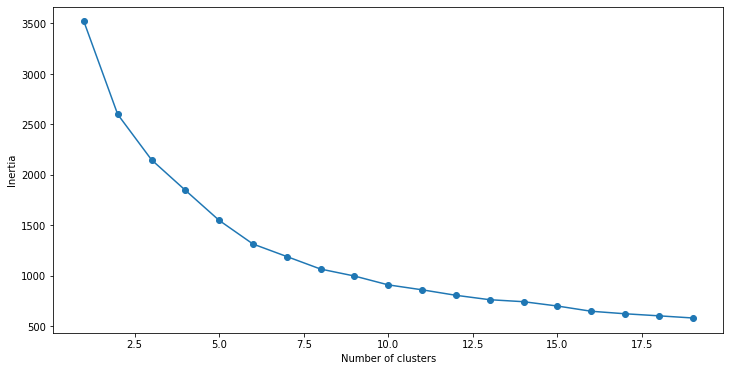

In [13]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
 kmeans = KMeans(n_clusters = cluster, init='k-means++')
 kmeans.fit(data_scaled)
 SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We got an elbow curve with 19 dots that represent each trained model, where the x-axis represents the number of
clusters and the y-axis represents inertia.

Looking at the above elbow curve, we
can choose any number of clusters between 5 to 8. Let’s set the number of clusters as 5
and fit the model:

In [14]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

Finally, let’s look at the value count of points in each of the above-formed clusters:

In [15]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    210
0    125
4     91
2     11
3      3
Name: cluster, dtype: int64

So we got a series containing the number of points in our 5 clusters, and it appears that the first cluster consists of 11 points, second - 210 points, third - 125 points, fourth - 91 points and fifth - 3 points. As we can see these clusters have different number of points, with edge clusters being the smallest, matching the normal distribution, and that confirms that using K-Means++ algorithm is better than using only K-Means, because it provides more accurate results.

<p style="text-align: center;"><b>Conclusion</b></p>

In this laboratory work we have learned the definition and purpose of clustering, determined that clustering is an unsupervised learning problem, reviewed main properties of clusters and applications of clustering in real-world scenarios. There also has been gained an understainding of the different evaluation metrics for clustering, such as inertia and Dunn index. We also became competent in the K-Means algorithm, that tries to minimize the distance of the points in a cluster with their centroid, and understood its challenges. To overcome them we applied the K-Means++ algorithm that specifies a procedure to initialize the cluster centers before moving forward with the standard K-Means clustering algorithm. Also we learned a technique how to choose the right value of clusters for the KMeans algorithm.
The result of the work is performing a clustering of bank customers data with the K-Means algorithm into 3 clusters, implementing the K-Means Clustering algorithm in Python, using K-Means++ to initialize the centroids and determining the right number of clusters for the provided dataset.